# End to End Machine Learning with Deployment

### Part1- EDA of Medical Dataset 
1. Import the libraries
2. Load the data and view it
3. Clean the data 
4. Perform EDA 

### Part2- Modelling of Dataset 
5. Preprocessing
6. Fitting and Evaluation
7. Optimization
8. Interpretation
9. Model Deploytment

In [4]:
!pip install xgboost --quiet

In [1]:
!pip install streamlit --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [2]:
!pip install imbalanced-learn --quiet

### Step1: Import the libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# libraries for preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

print("All libraries are imported")

All libraries are imported


### Step2:Load the data and view it

In [6]:
data=pd.read_csv("data.csv")
data.head(10)

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   
5           5            5      116             74              0        0   
6           6            3       78             50             32       88   
7           7           10      115              0              0        0   
8           8            2      197             70             45      543   
9           9            8      125             96              0        0   

    BMI  DiabetesPedigreeFunction  Age Outcome  
0  33.6                     0.627   50     Yes  
1  26.6                     0.351   31      No  
2  23.3                     0.672   32     Yes  
3  28.1                     0.167   21      No  
4  43.1                     2.288   33     Yes  
5  25.6                     0.201   30      No  
6  31.0                     0.248   26     Yes  
7  35.3                     0.134   29      No  
8  30.5                     0.158   53     Yes  
9   0.0                     0.232   54     Yes

In [3]:
data.shape

(768, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [5]:
data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    3.845052    3.369578   0.000    1.00000   
Glucose                   768.0  120.894531   31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000   62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000    0.00000   
Insulin                   768.0   79.799479  115.244002   0.000    0.00000   
BMI                       768.0   31.992578    7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   

                               50%        75%     max  
Unnamed: 0                383.5000  575.25000  767.00  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [7]:
data[~data.applymap(np.isreal).any(1)]

Empty DataFrame
Columns: [Unnamed: 0, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

**Observations**
1. The dataset has 768 rows and 10 columns
2. The column 'Unnamed: 0' is redundant
3. There are no nulls 
4. However there are 0's present as null which we have to take care of
5. There are no corrupt characters

### Step3: Clean the data 

In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)

In [10]:
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [11]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

### Step4: Perform EDA 
1. Univariates- NUmerical
2. UNivariates- Categorical
3. BUvariate - Categorical vs Numerical
4. Bivariate - Numerical vs Numerical 
5. MUltivaraite Pairplot
6. Correlations and Heatmpap
7. Outcome is a binary categorical variable


In [12]:
def histograms(df):
    df.hist()
    plt.tight_layout()
    plt.show()

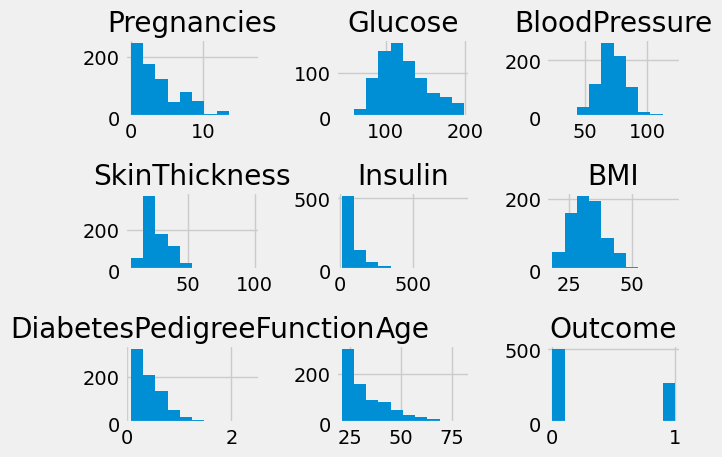

In [13]:
histograms(df)

In [13]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Outcome


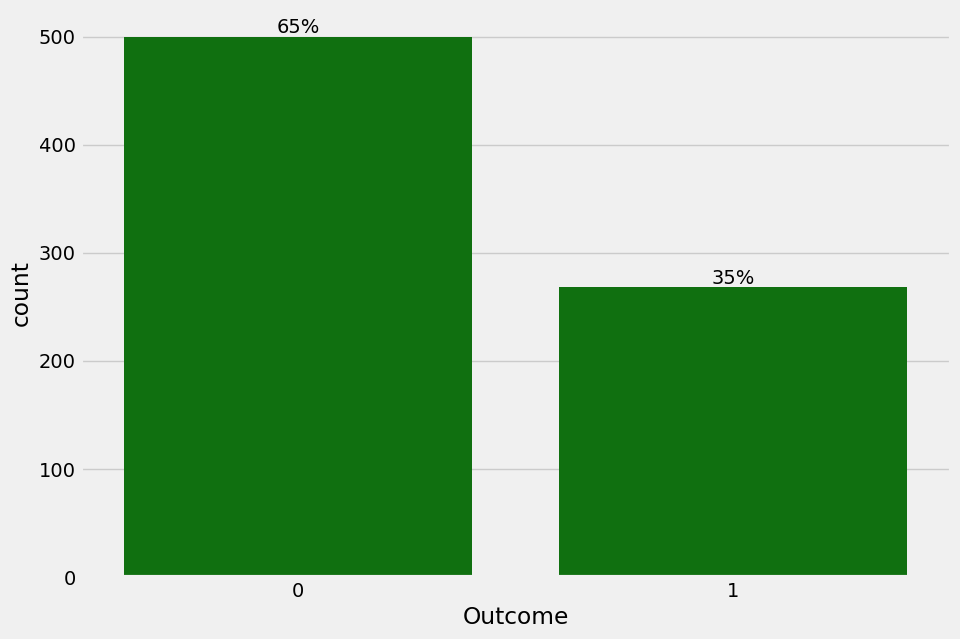

In [14]:
barplot(df, 'Outcome')

In [14]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Pregnancies


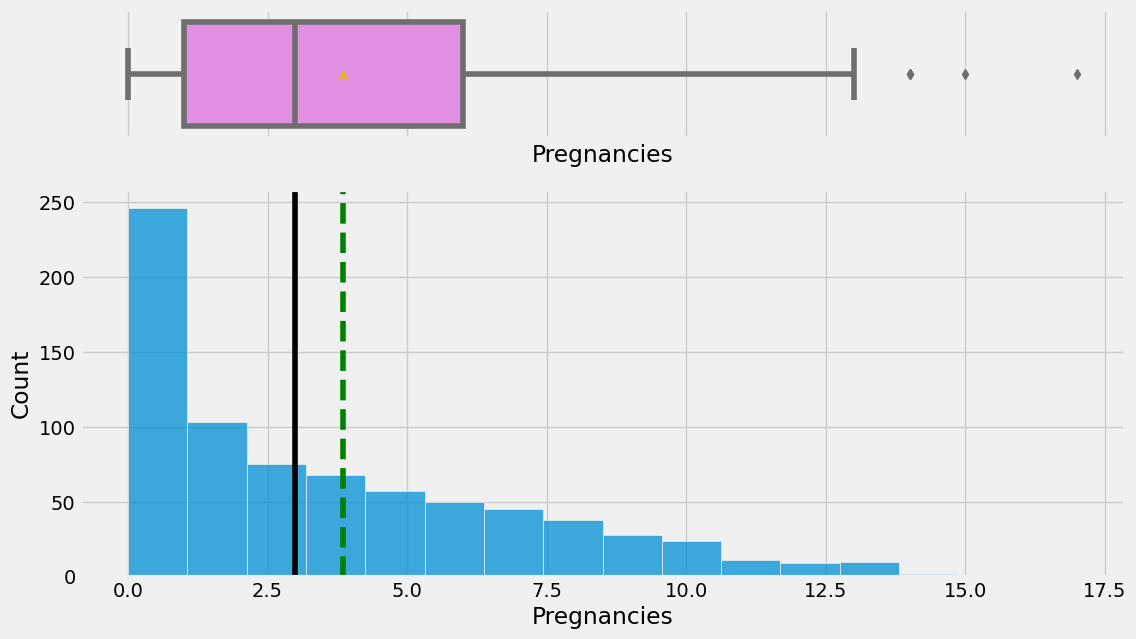

Boxplot and Histplot for  Glucose


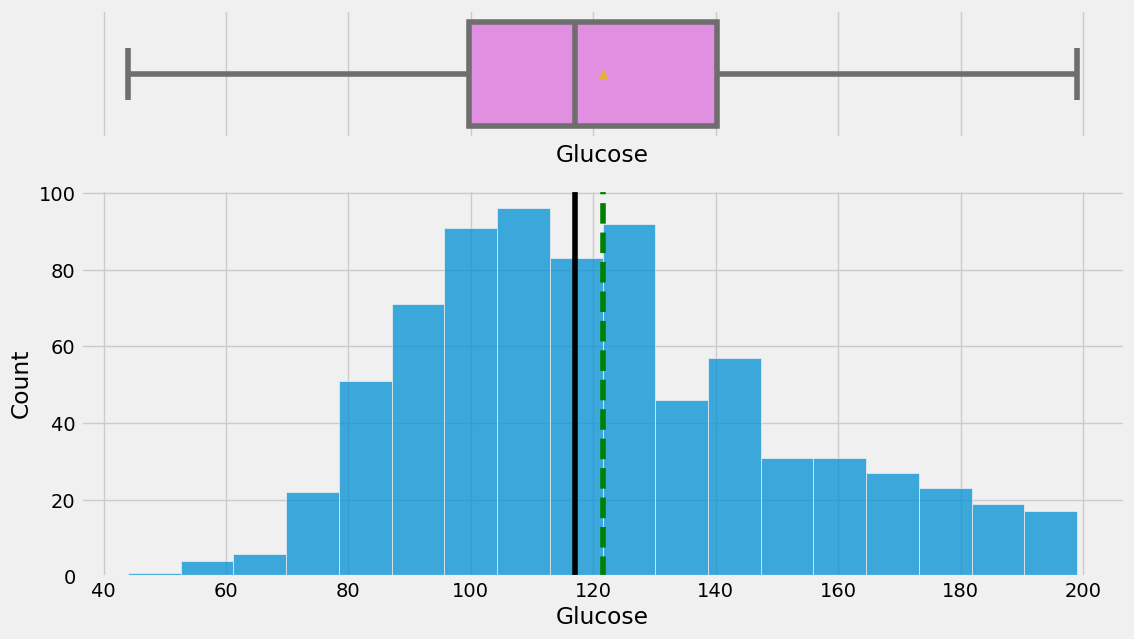

Boxplot and Histplot for  BloodPressure


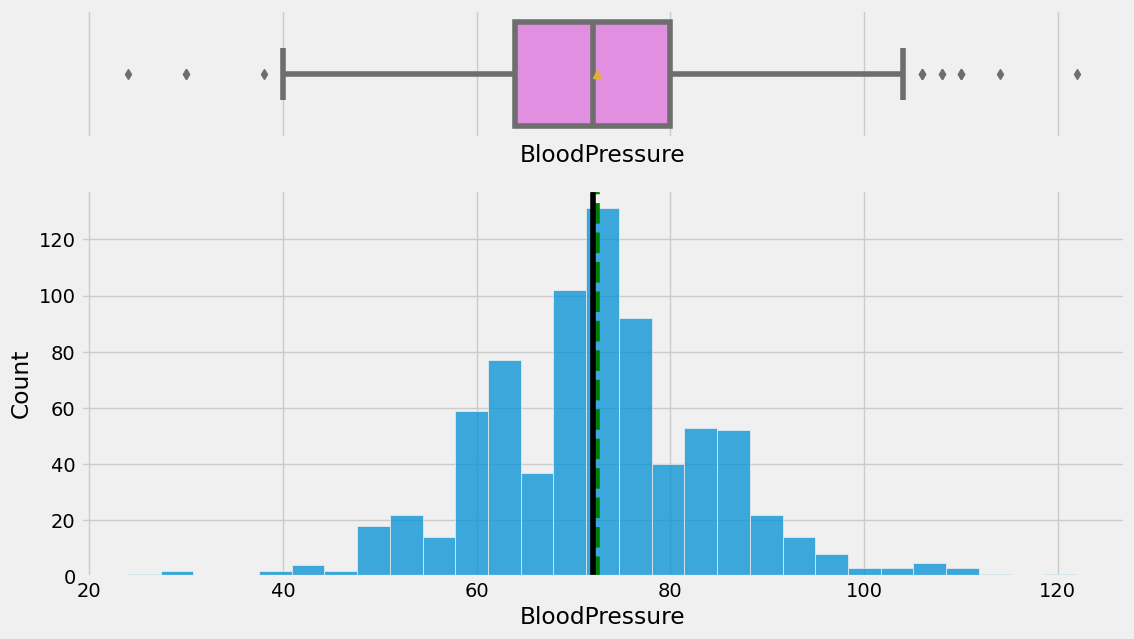

Boxplot and Histplot for  SkinThickness


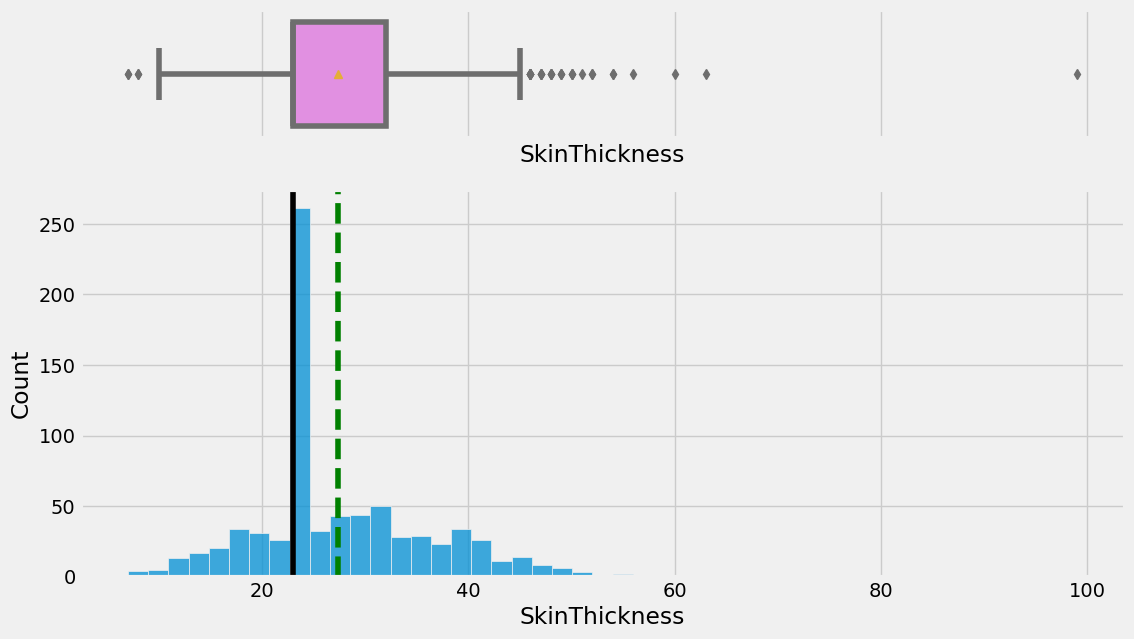

Boxplot and Histplot for  Insulin


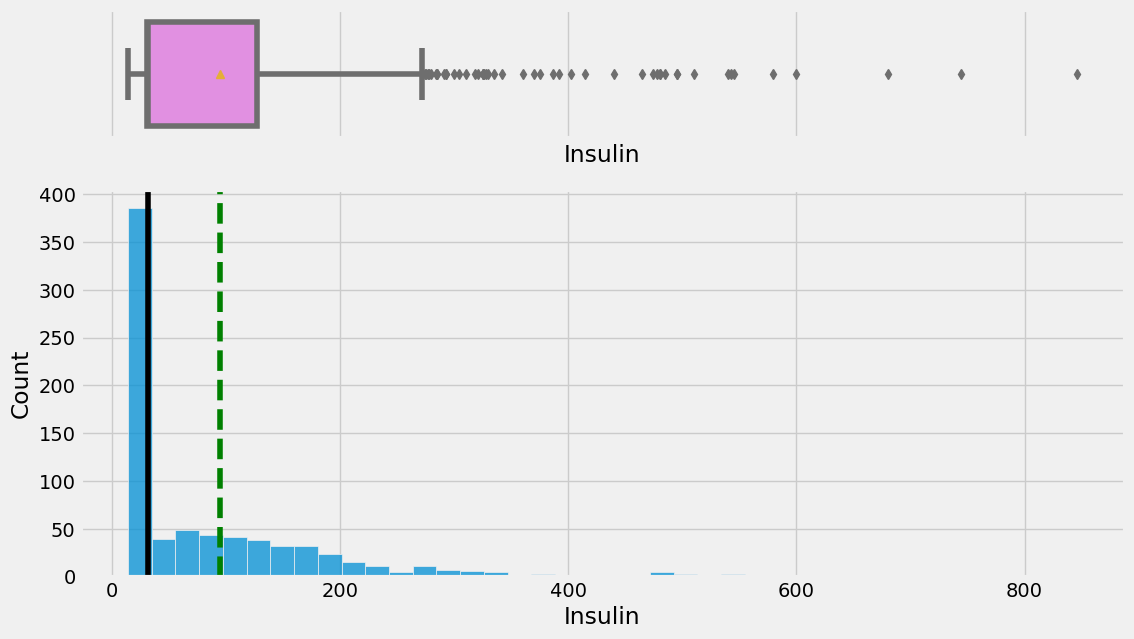

Boxplot and Histplot for  BMI


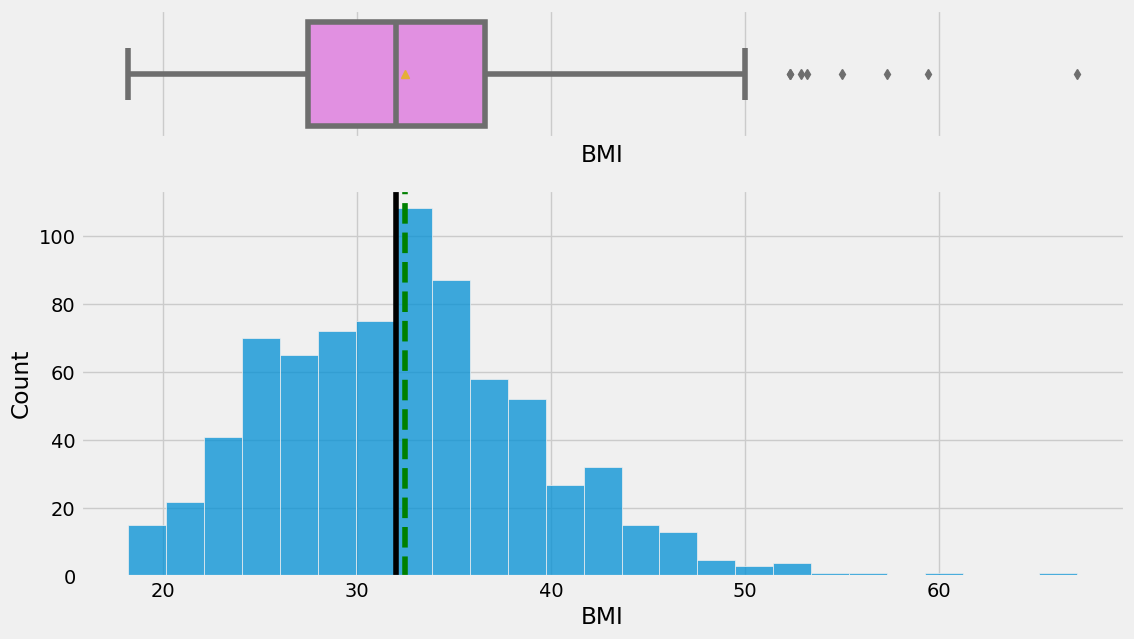

Boxplot and Histplot for  DiabetesPedigreeFunction


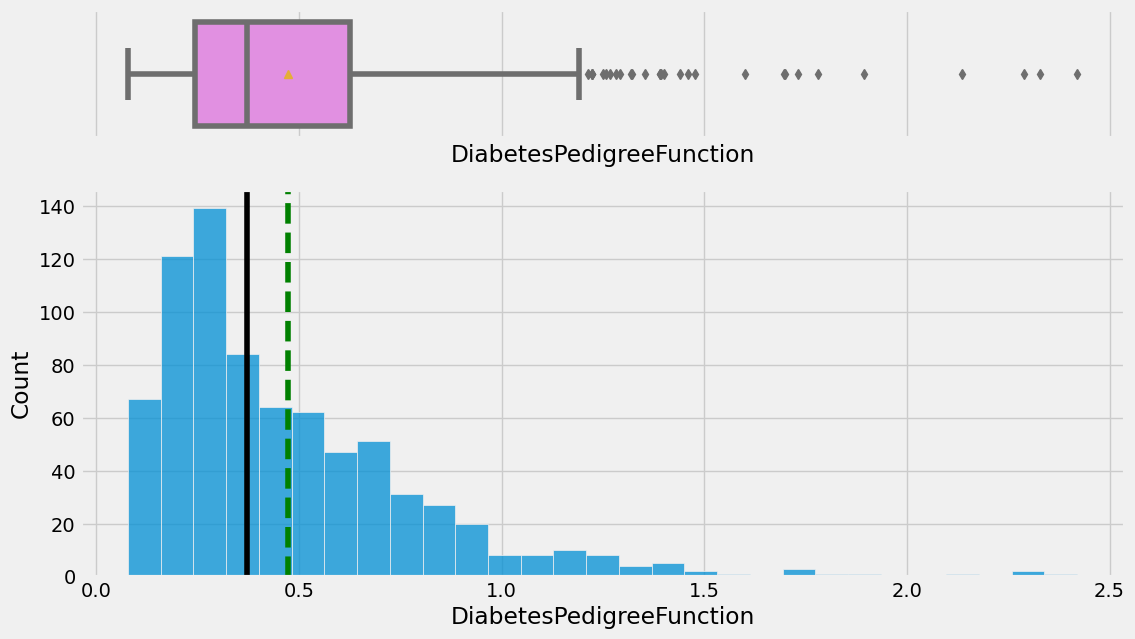

Boxplot and Histplot for  Age


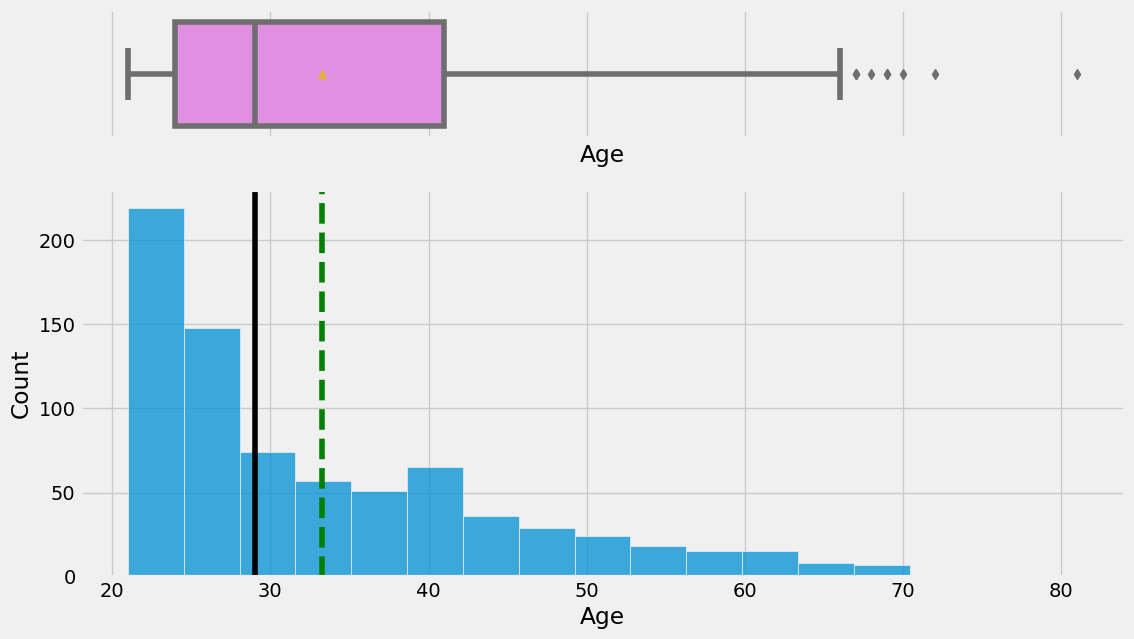

Boxplot and Histplot for  Outcome


In [15]:
for col in df.select_dtypes(exclude='O').columns:
    boxplot_histplot(df, col)

**Observations**
1. We see that Pregnancies, Insulin, Dpf and Age are huighly right skewed
2. Wee see that Outcome is highly imbalanced
3. We see that skin thickness, insulin and Dpf have very high amount of outliers 

**Bivariate Analysis**

In [17]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Outcome and Pregnancies


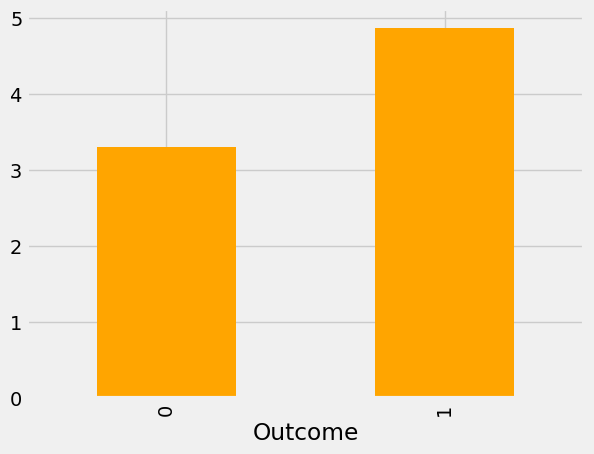

The Bivariate barchart between Outcome and Glucose


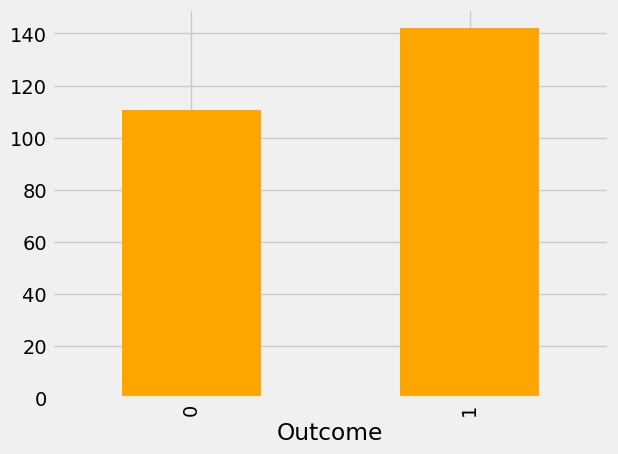

The Bivariate barchart between Outcome and BloodPressure


The Bivariate barchart between Outcome and SkinThickness


The Bivariate barchart between Outcome and Insulin


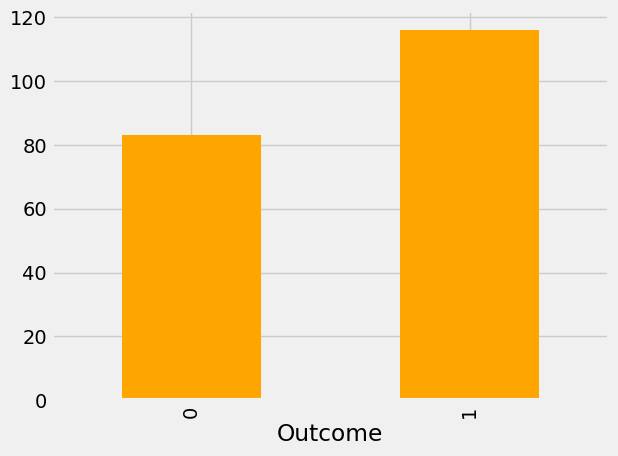

The Bivariate barchart between Outcome and BMI


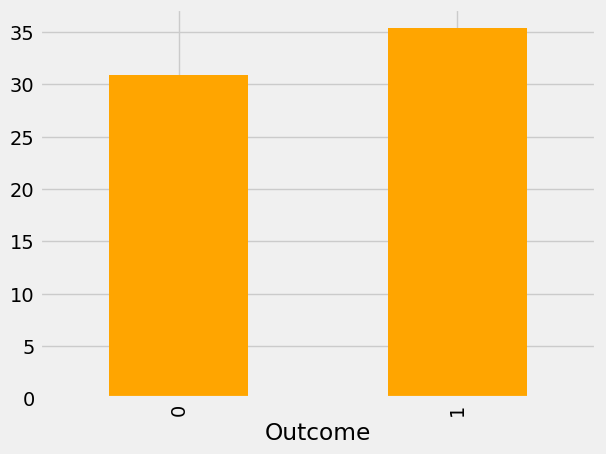

The Bivariate barchart between Outcome and DiabetesPedigreeFunction


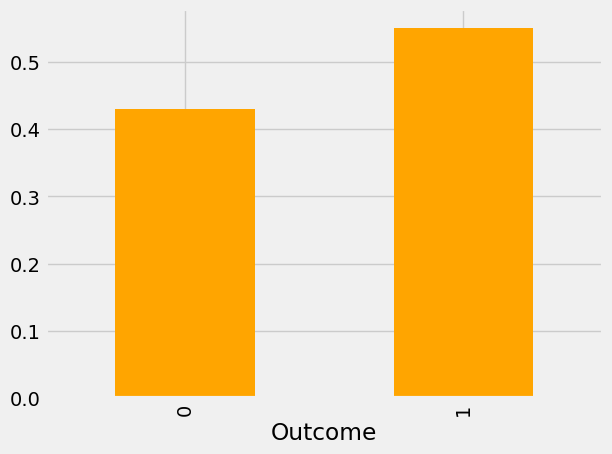

The Bivariate barchart between Outcome and Age


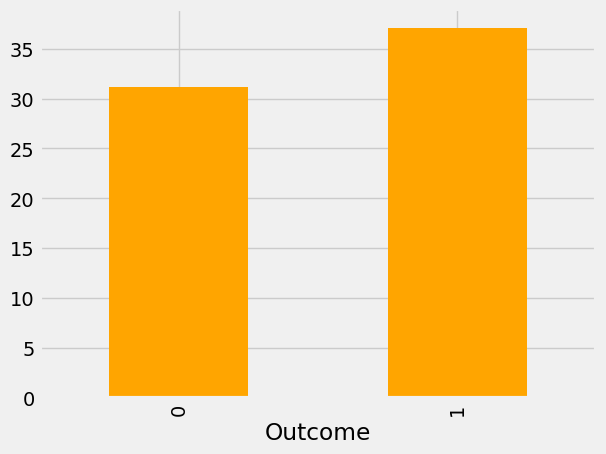

The Bivariate barchart between Outcome and Outcome


In [18]:
for col in df.select_dtypes(exclude='O').columns:
    catnum(df,'Outcome' ,col)

**Observation**
The graphs show that women with higher no.of pregnancies, hiugher glucose level, higher insulin level , higher dpf and age are more likely tobe diabetic |

In [19]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Age and Pregnancies


Bivariates between Age and Glucose


Bivariates between Age and BloodPressure


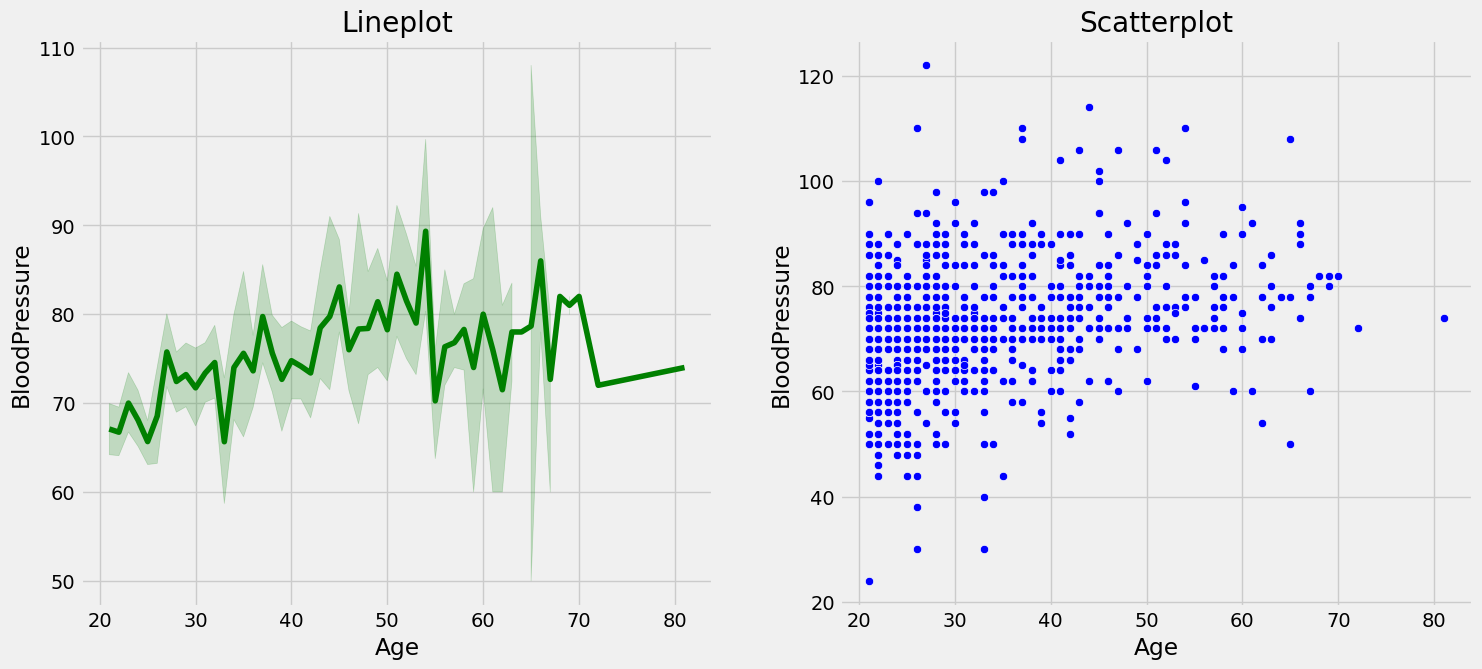

Bivariates between Age and SkinThickness


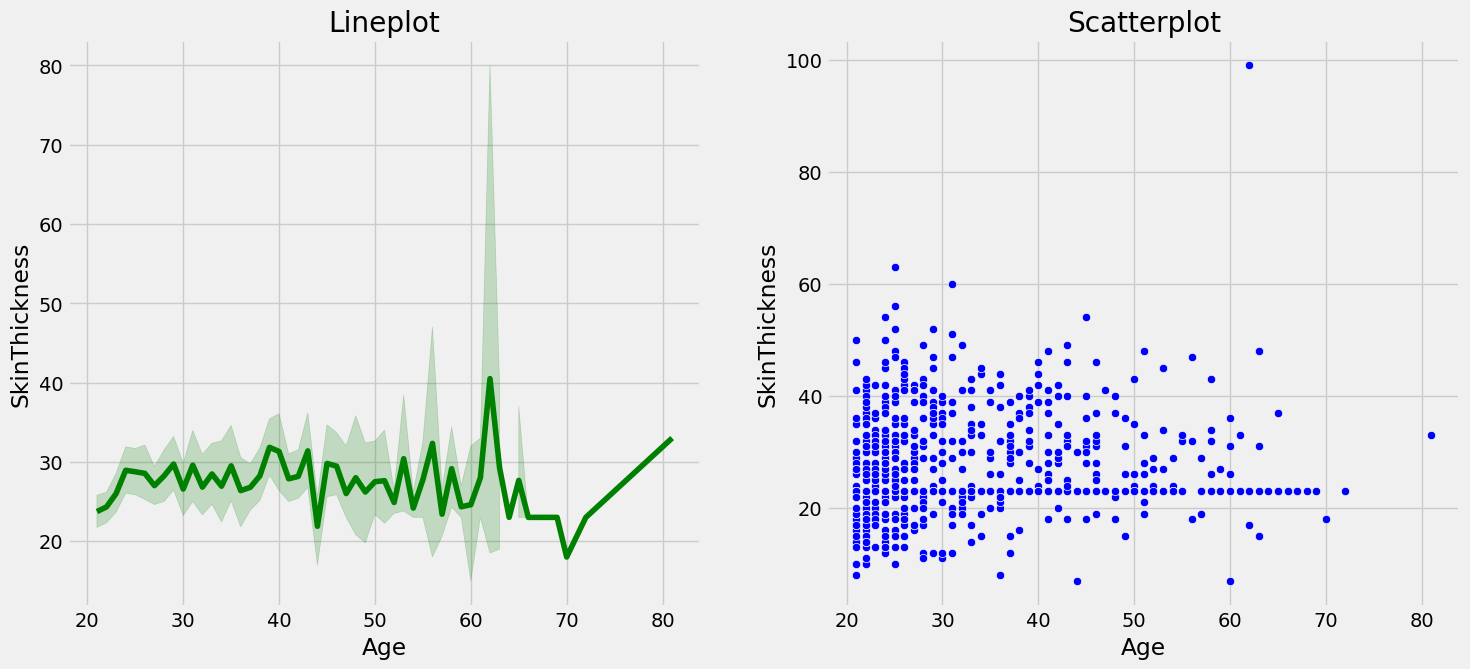

Bivariates between Age and Insulin


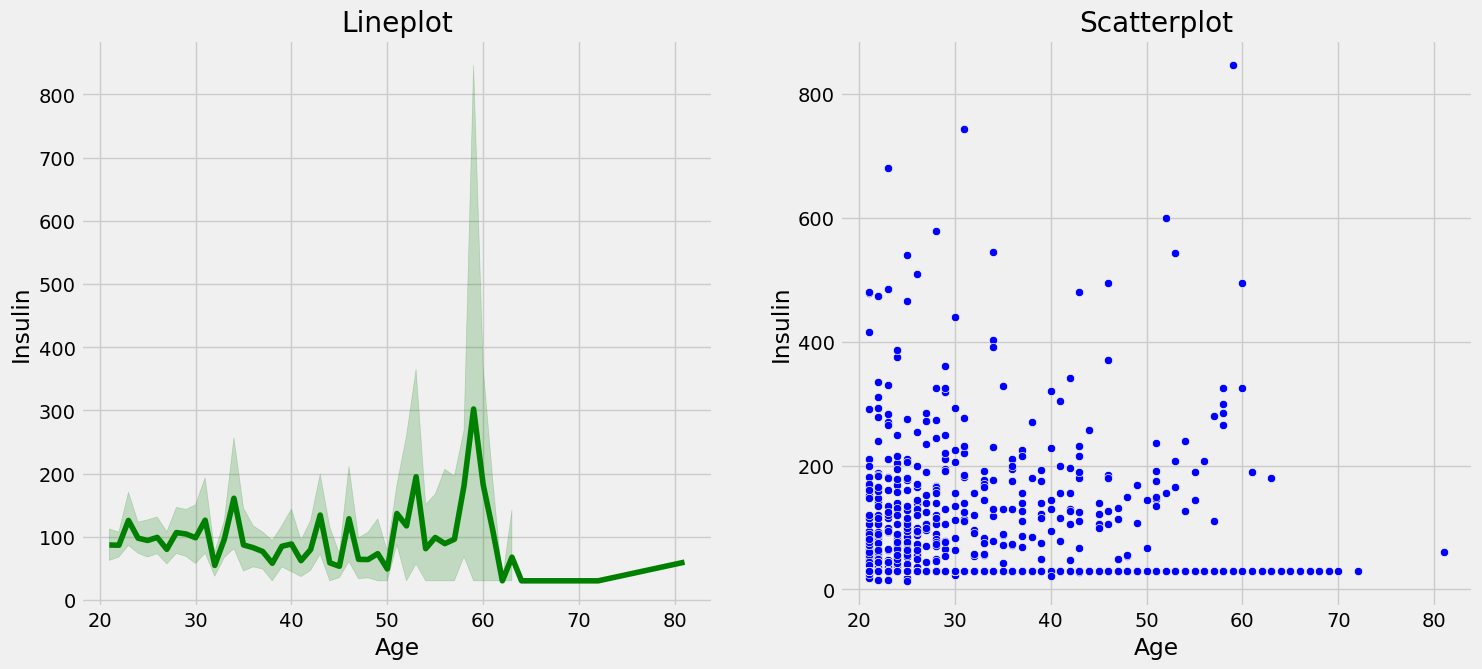

Bivariates between Age and BMI


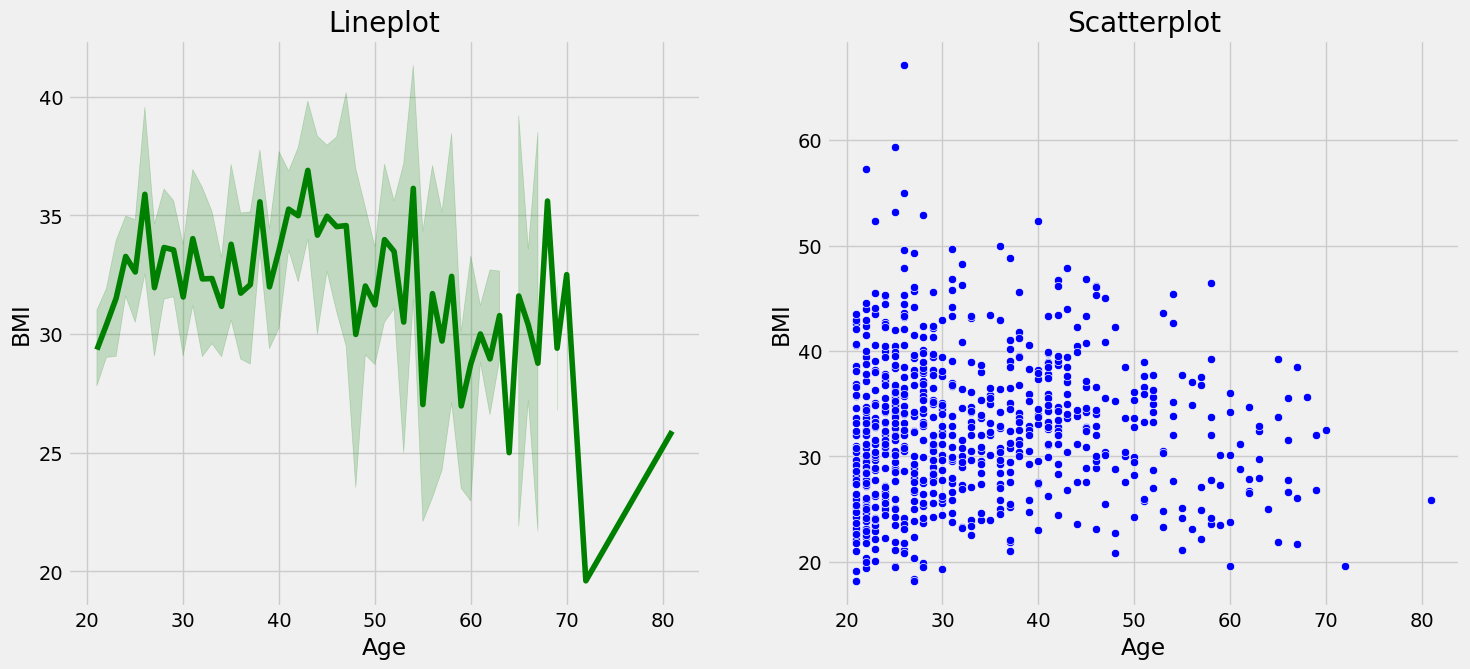

Bivariates between Age and DiabetesPedigreeFunction


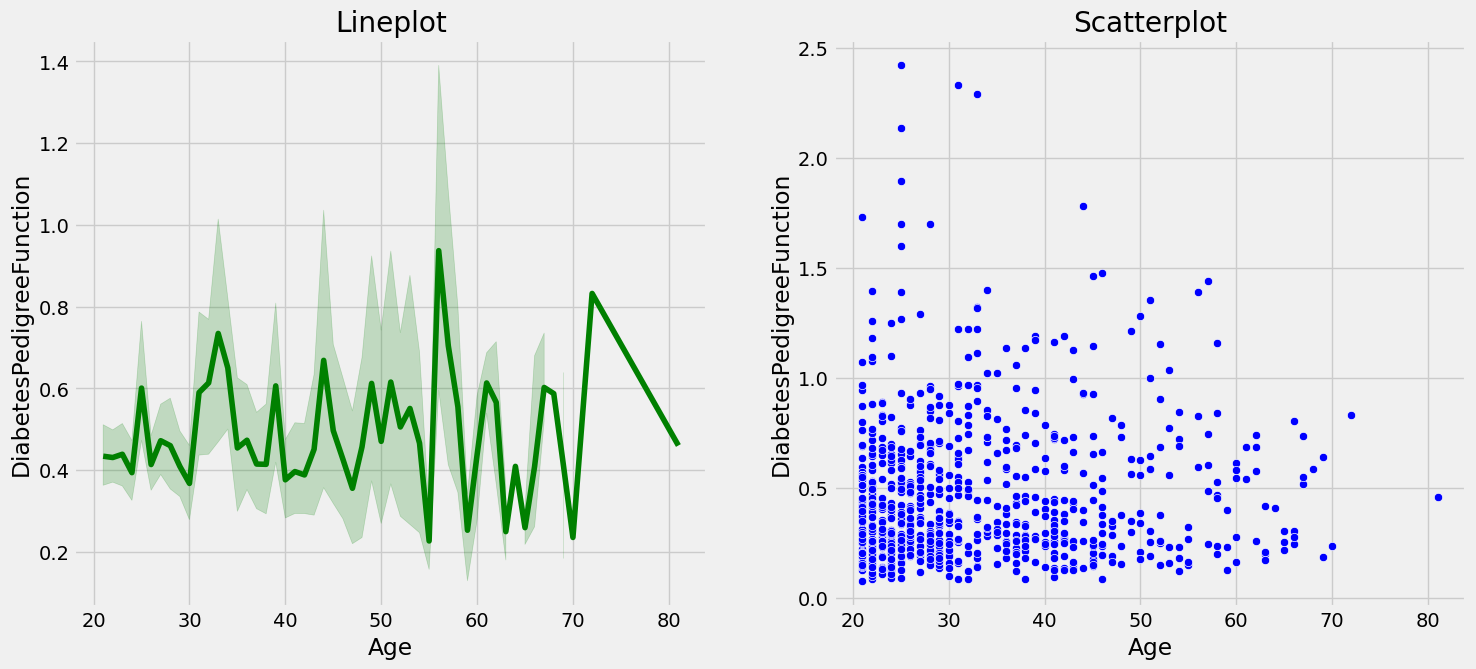

Bivariates between Age and Age


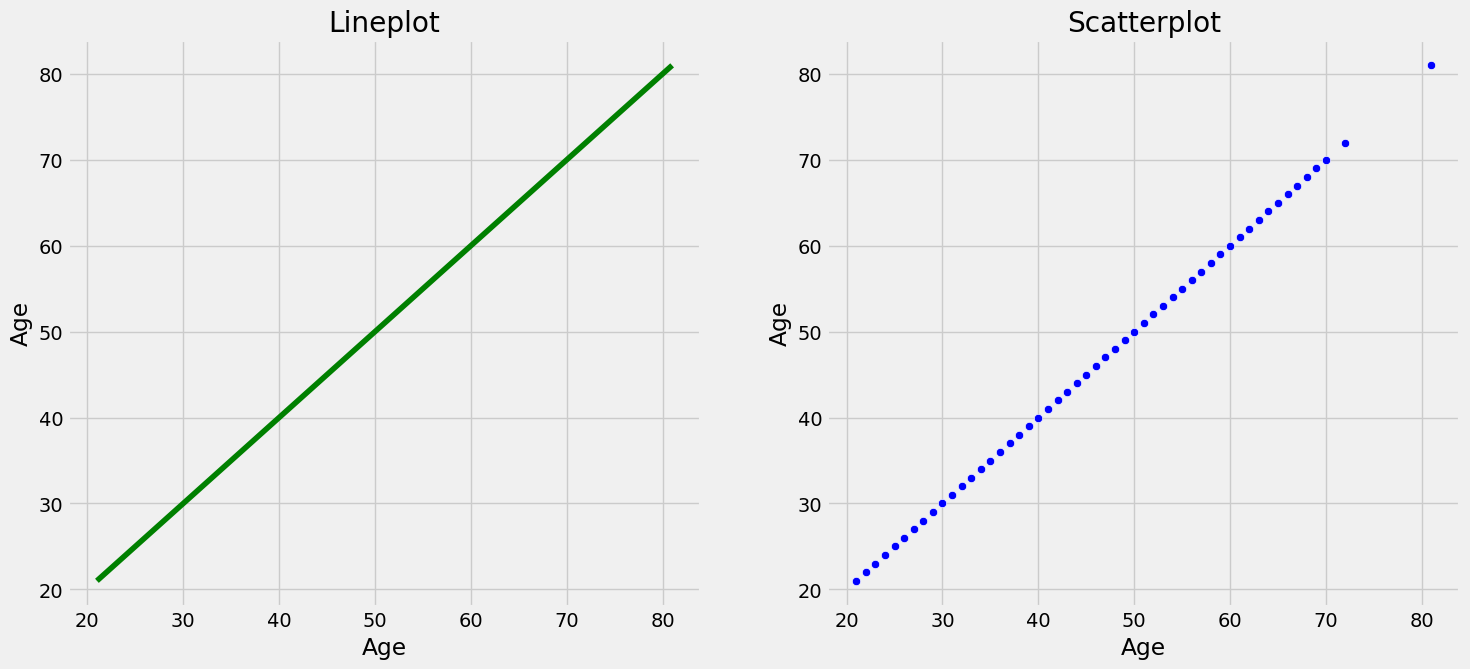

Bivariates between Age and Outcome


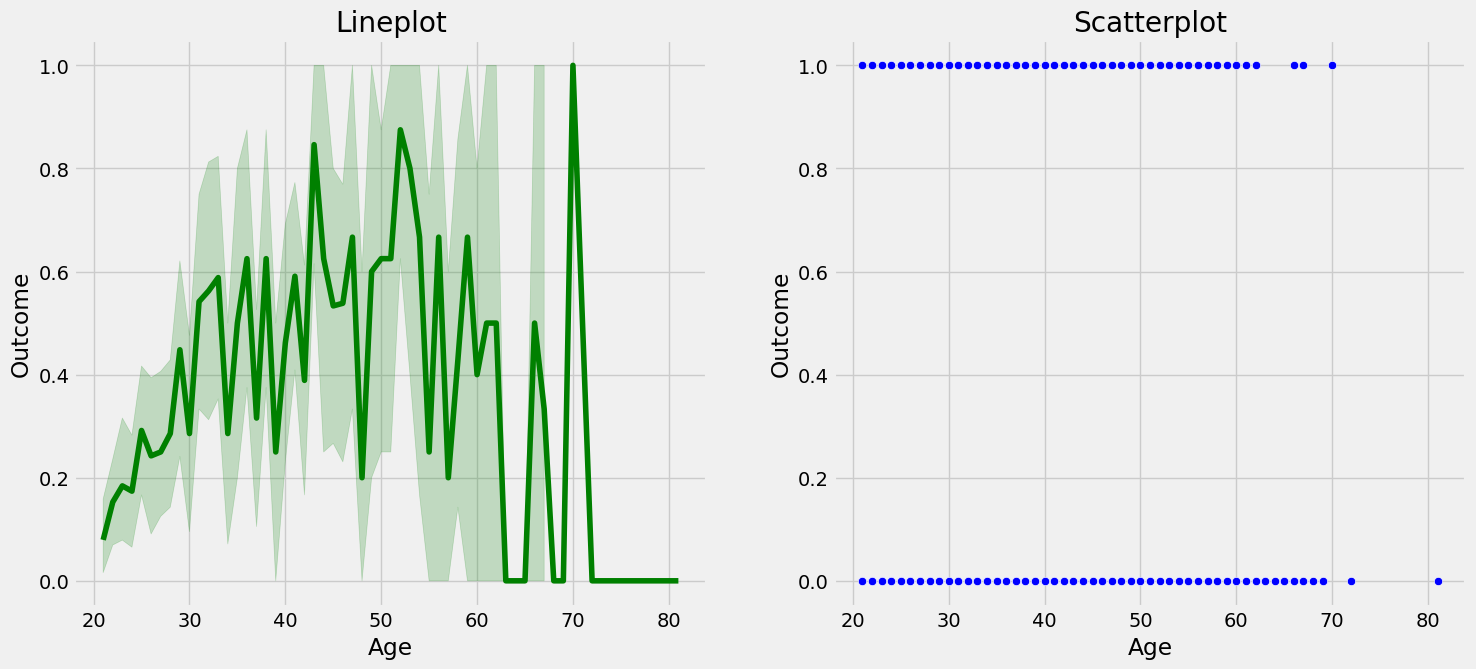

In [20]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df,feature1='Age', feature2=col)
    

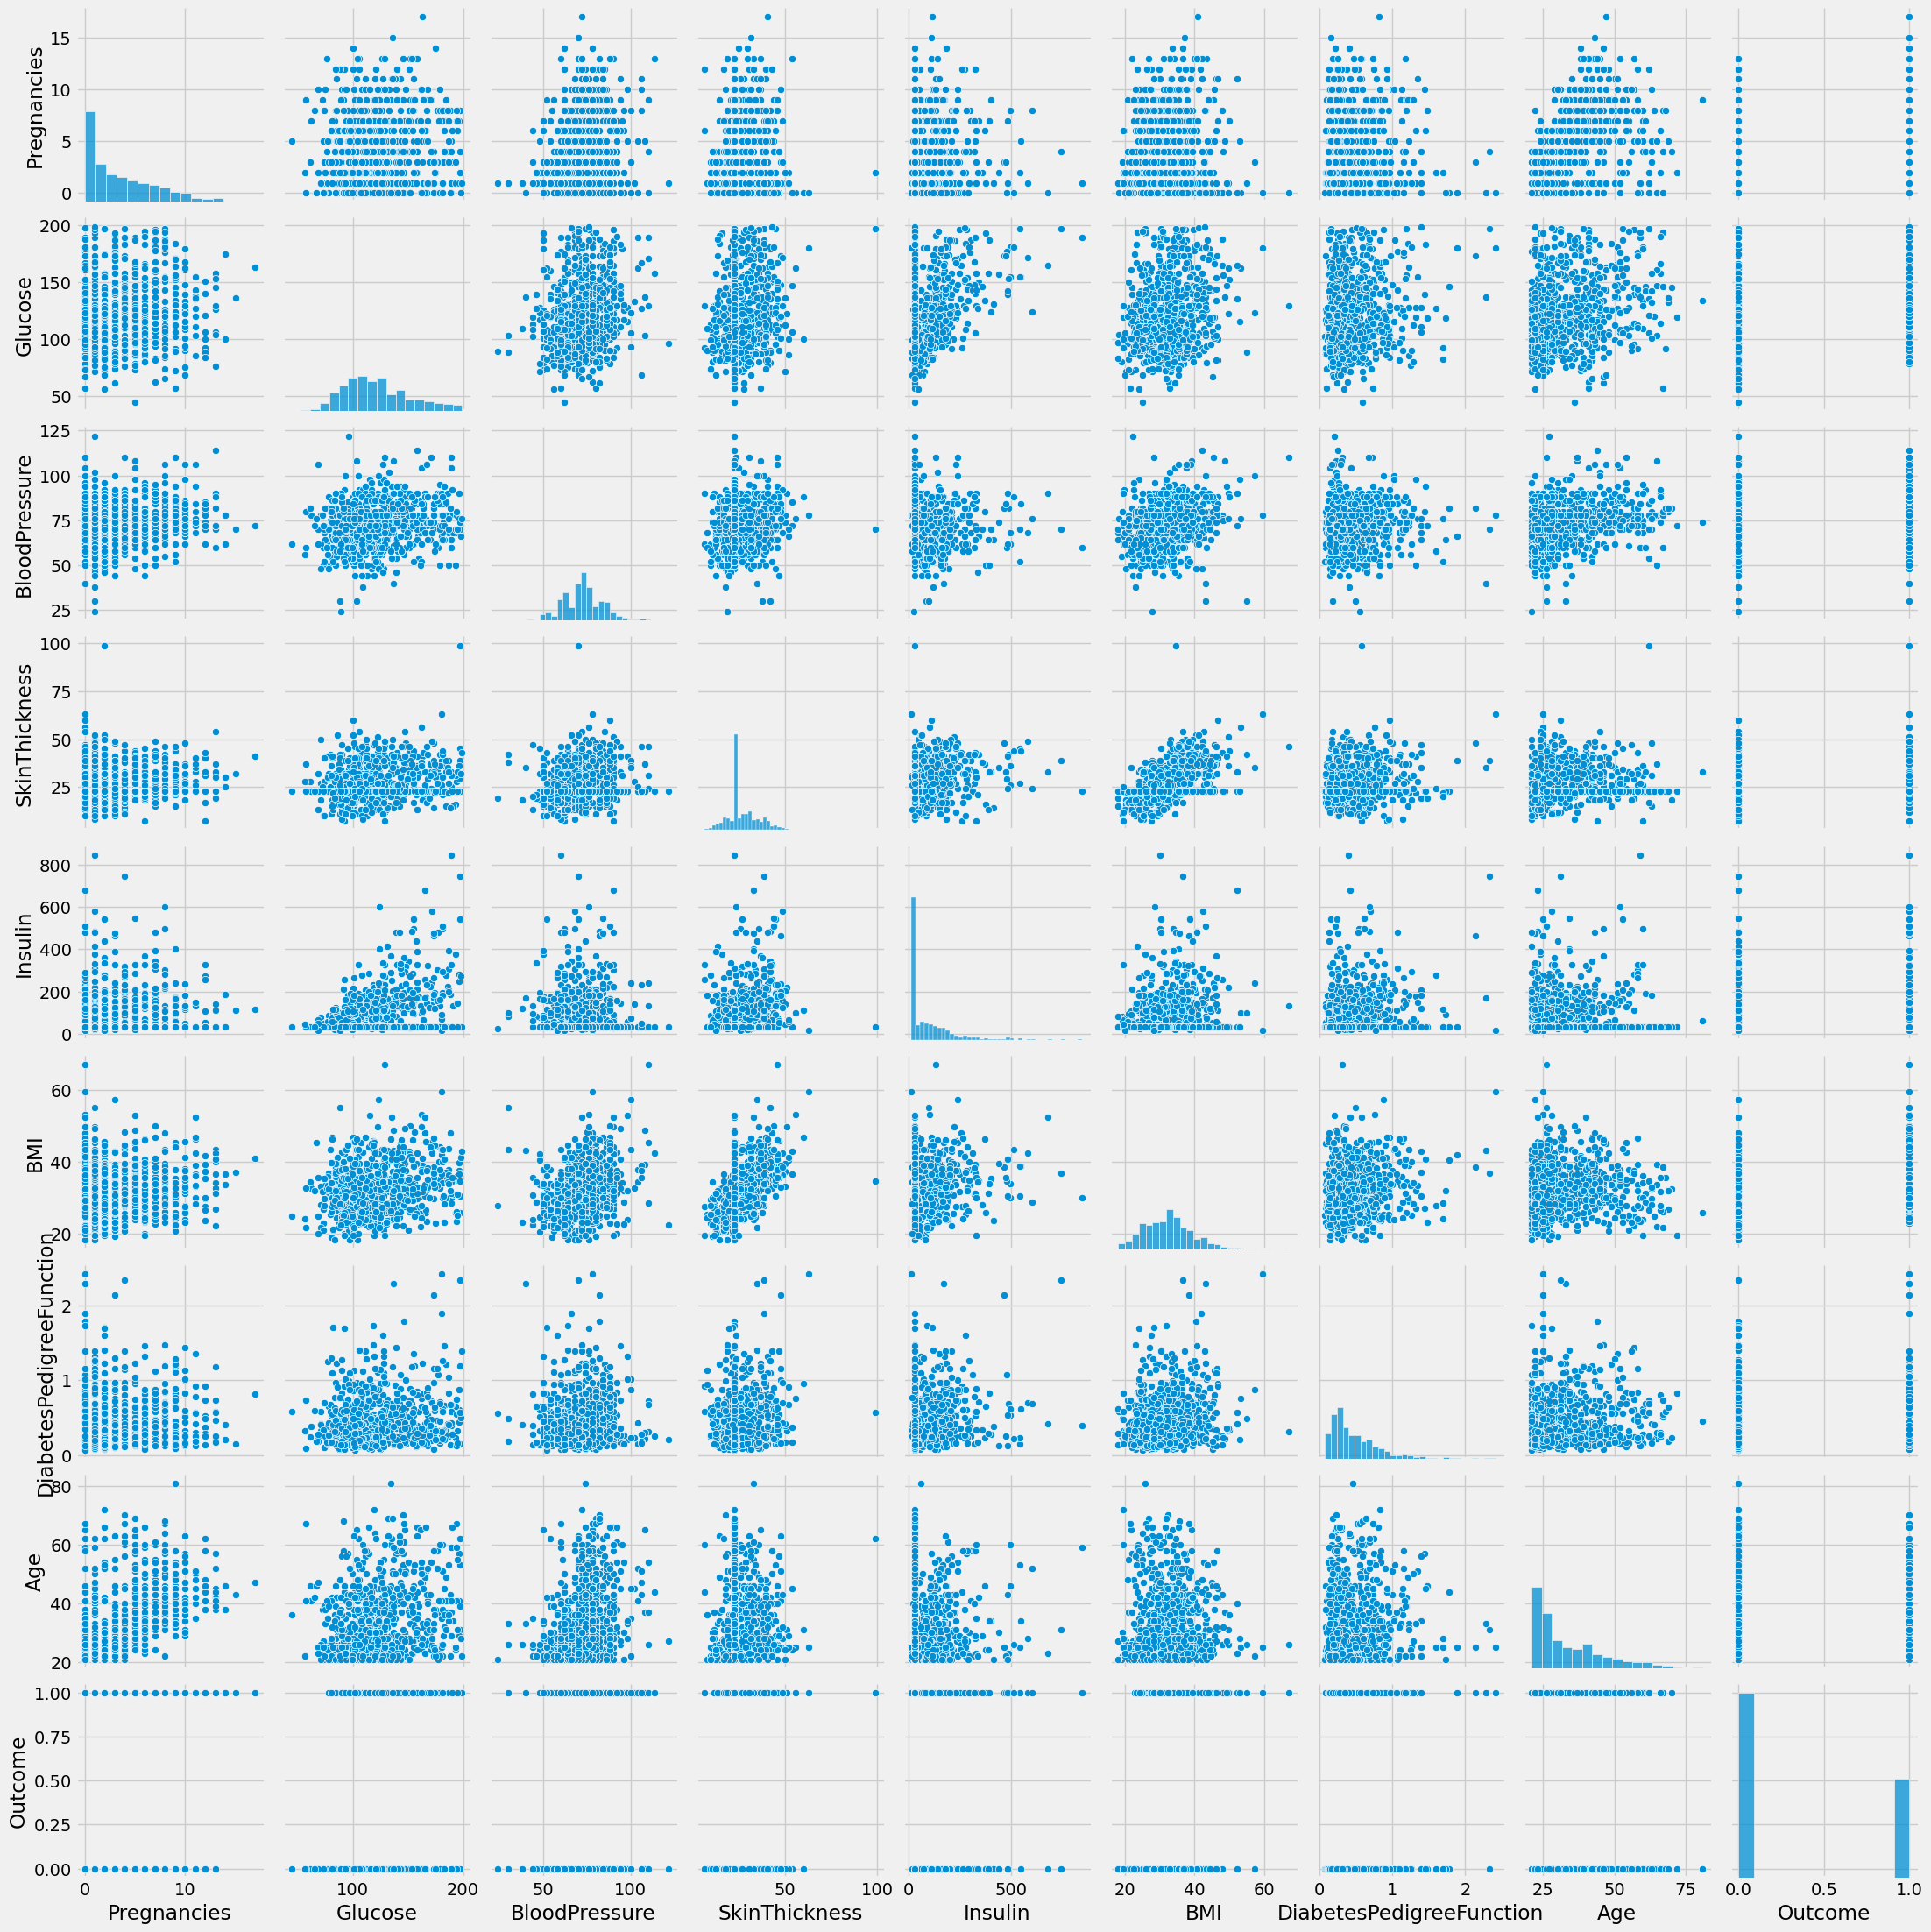

In [21]:
sns.pairplot(df)

**Observations**
There appears multicollinearity between Glucose and Insulin, BMI and skin thickness

In [22]:
# Lets look at variables most correlated with Outcome 
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

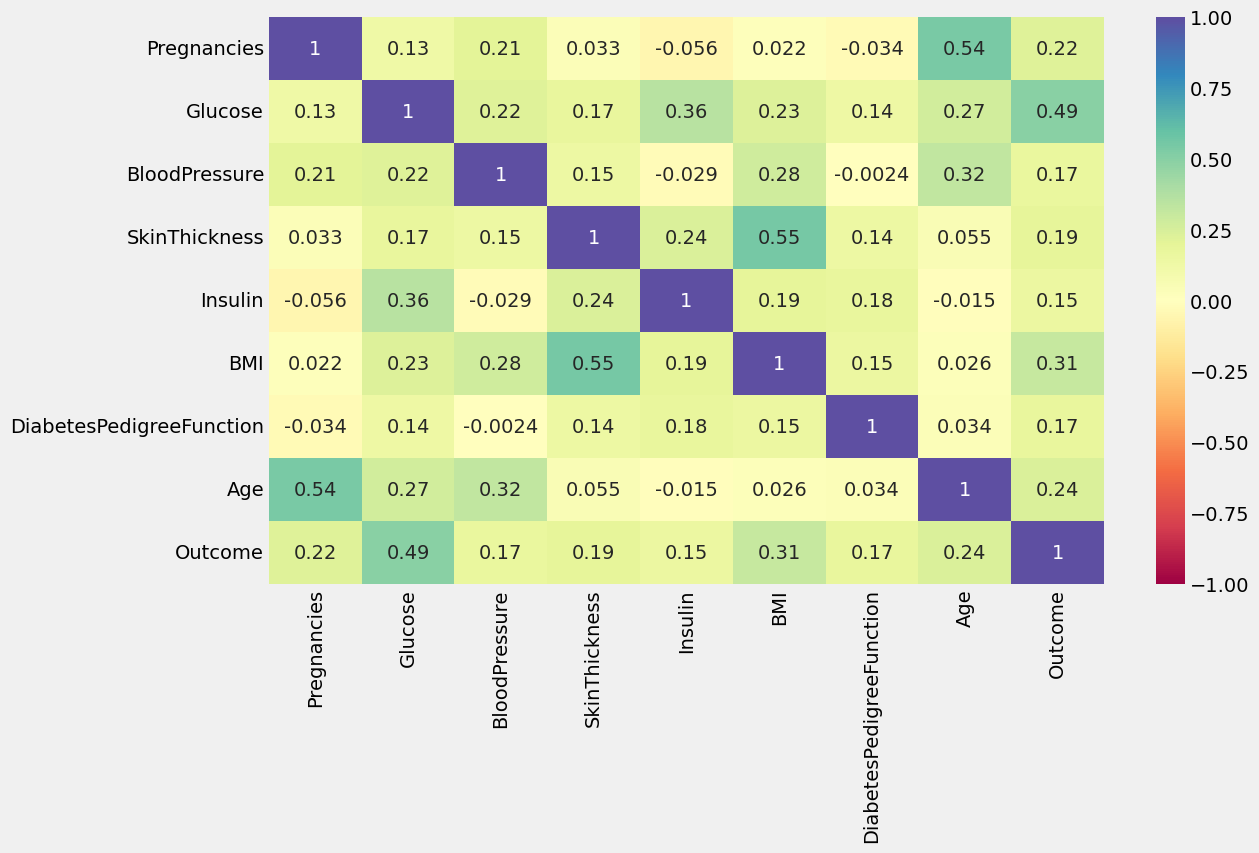

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)

**Observations**
Glucose and BMI are the strongest predictors of Outcome 

Lets create an app top display these charts 

In [24]:
#!pip install streamlit

In [25]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

#load and clean the data
data=pd.read_csv("data/data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)
def view_data(data):
    st.write(df.head(10))
    st.pyplot()

def histograms(df):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    st.pyplot()
    
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    st.pyplot()
    
st.sidebar.subheader("Choose the Plot")
plot=st.sidebar.selectbox('plot', ('Data', 'Histograms', 'Barchart', 'Boxplot_Scatterplot', 'Correlations'))

if st.sidebar.button('PLOT'):
    if plot=='Data':
        view_data(df)
    if plot=='Histograms':
        histograms(df)
    if plot=='Barchart':
        barplot(df, feature='Outcome')
    if plot=='Boxplot_Scatterplot':
        for col in df.select_dtypes(exclude='O').columns:
            boxplot_histplot(df, col)
    if plot=='Correlations':
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
        st.pyplot()
        
        
        
        

Overwriting eda.py


### Step5: Preprocessing
- separate the features and label
- impute nulls
- encode categoricals
- solve data imbalance
- train test split
- standard scaling

In [20]:
# create a function to do the preprocessing
def preprocess(data,label):
    X = df.drop(label,axis=1)
    y = df[label]
    
    sm = SMOTE()
    X,y = sm.fit_resample(X,y)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
    
    return X_train,X_test,y_train,y_test

In [21]:
X_train,X_test,y_train,y_test = preprocess(df,'Outcome')

In [22]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
def print_metrics(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print('roc score:',roc_auc_score(y_test,y_pred))

In [24]:
def plot_metrics(clf,X_test,y_test,model_name):
    plot_confusion_matrix(clf,X_test,y_test,display_labels=[0,1])
    print()
    plot_roc_curve(clf,X_test,y_test)
    print()
    plot_precision_recall_curve(clf,X_test,y_test)

In [25]:
# unbalanced data -> precison recall curve is best
# balance data -> roc curve is best

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [28]:
print_metrics(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.76      0.64      0.70       139
           1       0.73      0.83      0.77       161

    accuracy                           0.74       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300

roc score: 0.733187363152956


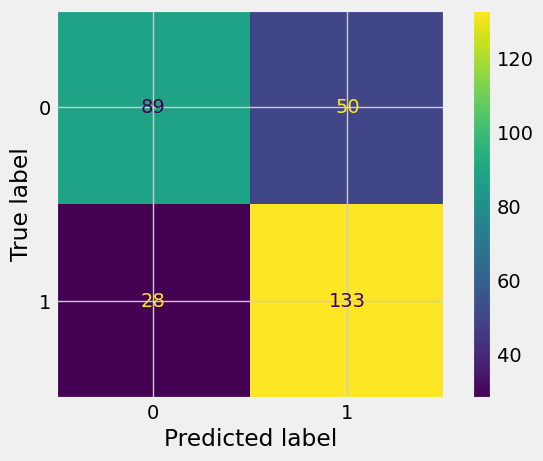

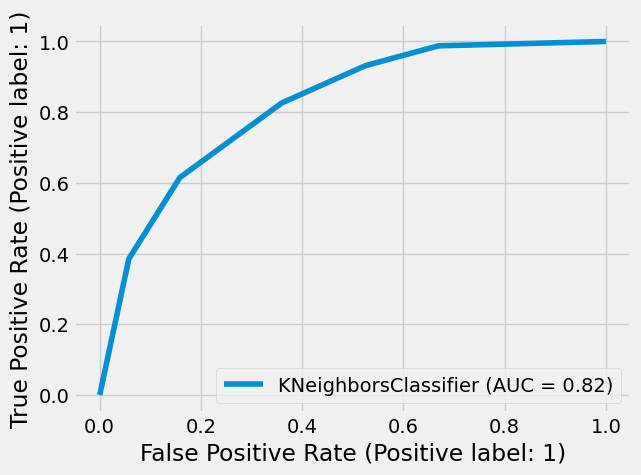

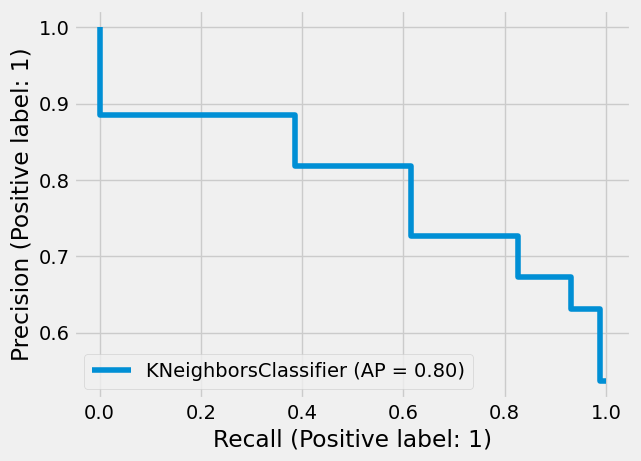

In [29]:
plot_metrics(knn,X_test,y_test,'KNN')

In [46]:
y_score = knn.predict_proba(X_test)

In [47]:
y_score = y_score[:,1]

In [48]:
roc_auc_score(y_test,y_score)

0.8189597390410653

In [37]:
from sklearn import metrics

In [49]:
sklearn.metrics.roc_auc_score(y_test,y_score)

0.8189597390410653

In [39]:
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.733187363152956

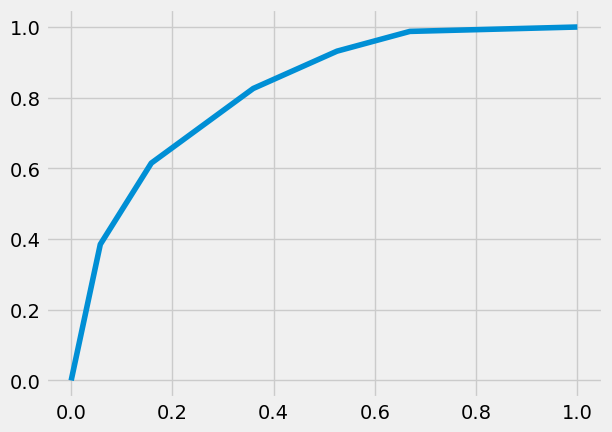

In [50]:
tpr,fpr,t = metrics.roc_curve(y_test,y_score)
plt.plot(tpr,fpr)

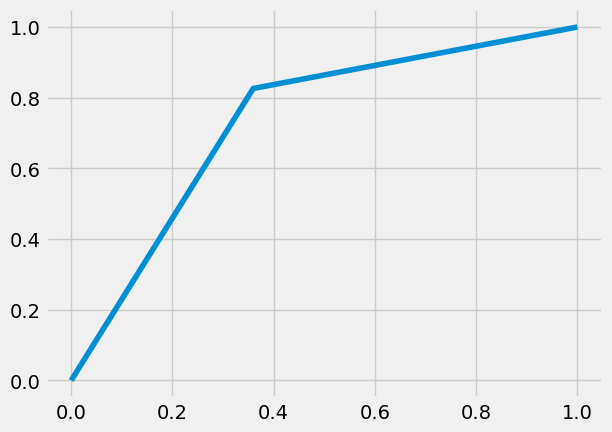

In [51]:
tpr,fpr,t = metrics.roc_curve(y_test,y_pred)
plt.plot(tpr,fpr)

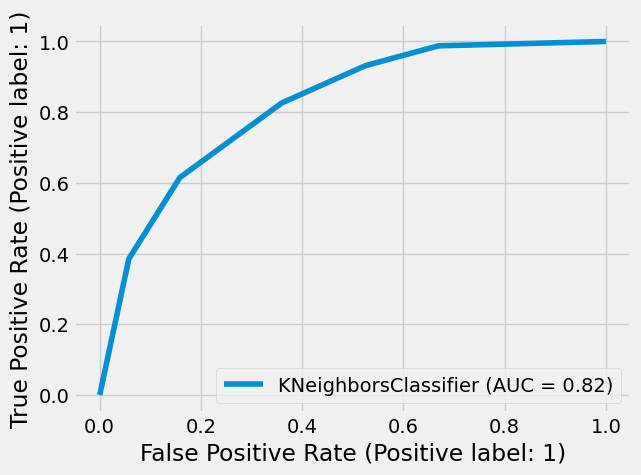

In [52]:
plot_roc_curve(knn,X_test,y_test)

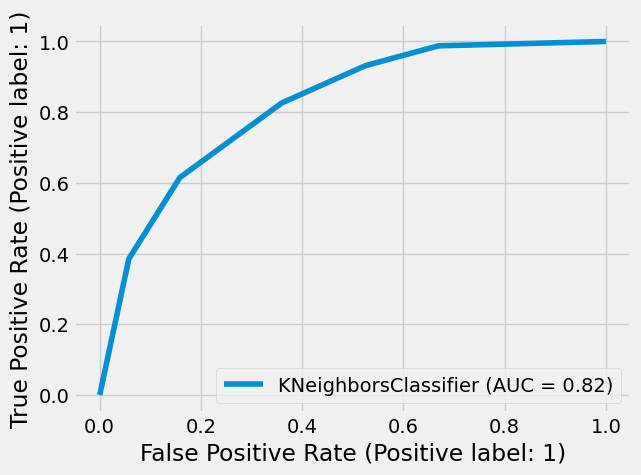

In [53]:
metrics.RocCurveDisplay.from_estimator(knn,X_test,y_test)

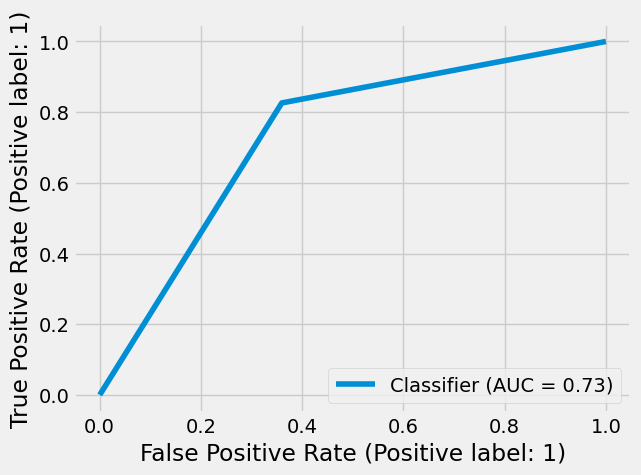

In [54]:
metrics.RocCurveDisplay.from_predictions(y_test,y_pred)

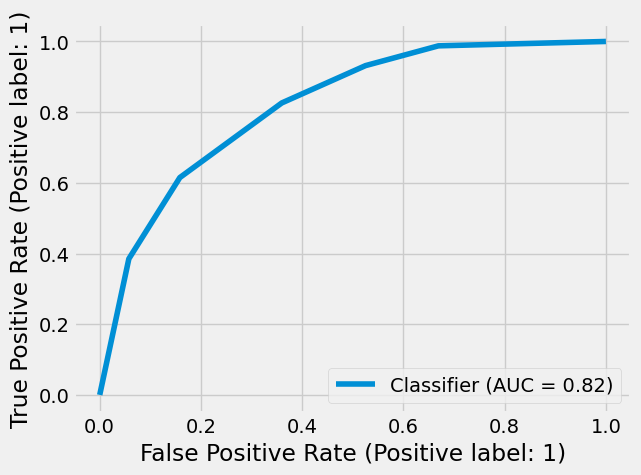

In [55]:
metrics.RocCurveDisplay.from_predictions(y_test,y_score)

0.7846865364850977
0.8083024263818758
0.8084588230037089
0.8079896331382098
0.8189597390410653
0.8151391929934314
0.8229813664596274
0.8161445998480719
0.8205683900084901
0.8227802850886992
0.8317842620313687


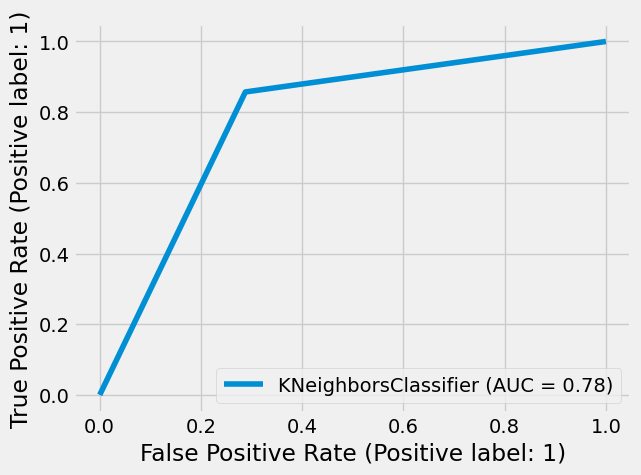

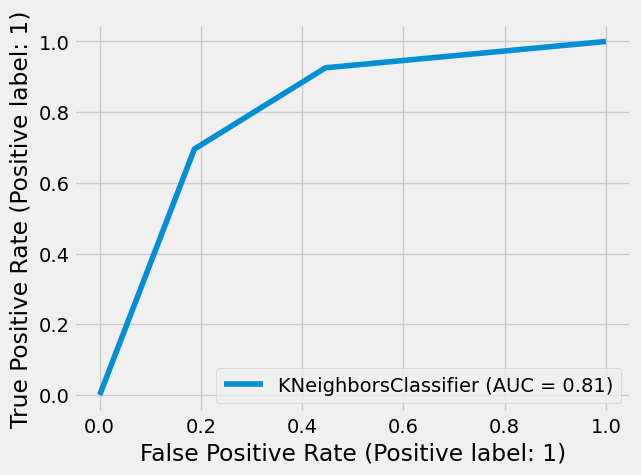

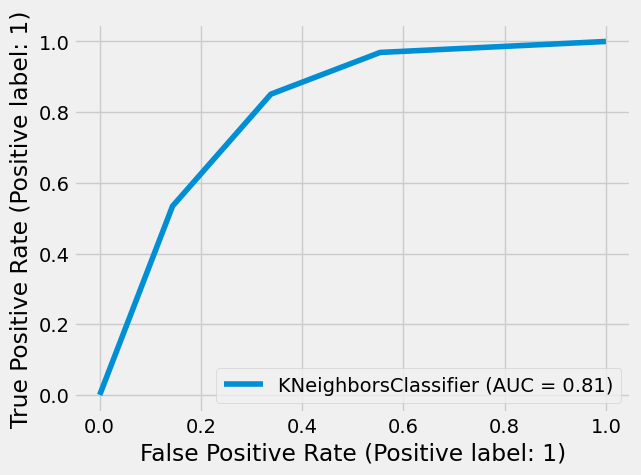

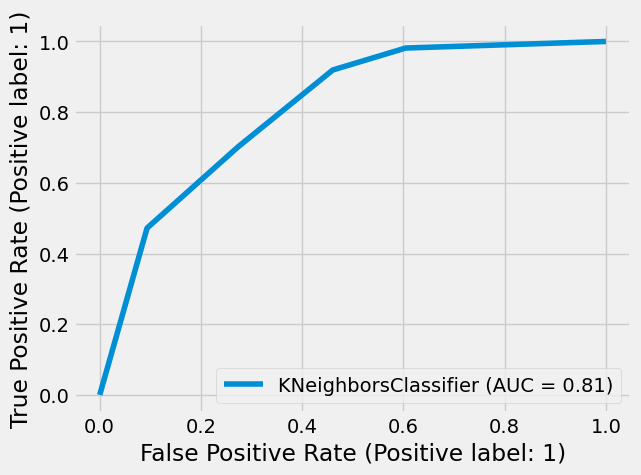

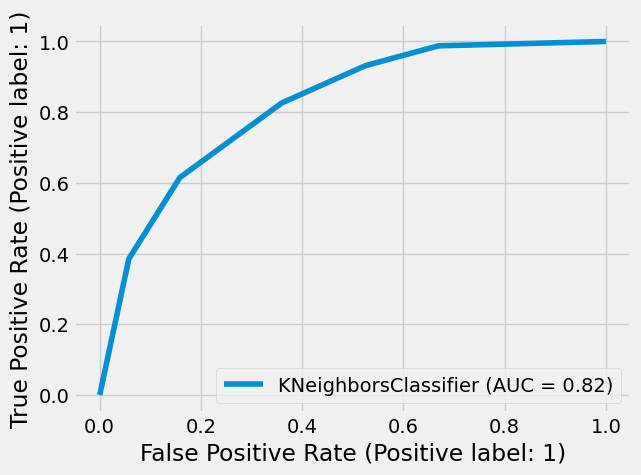

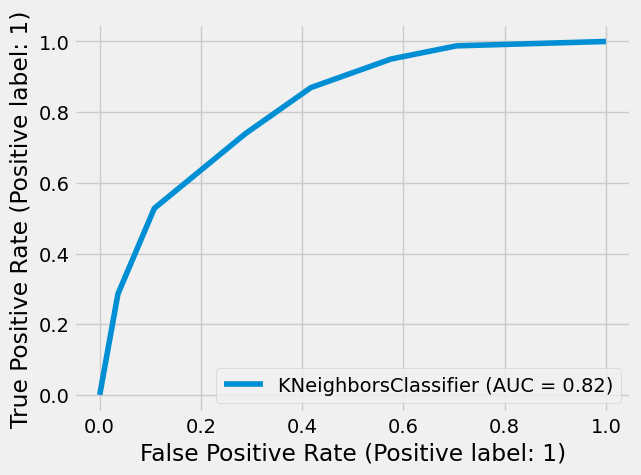

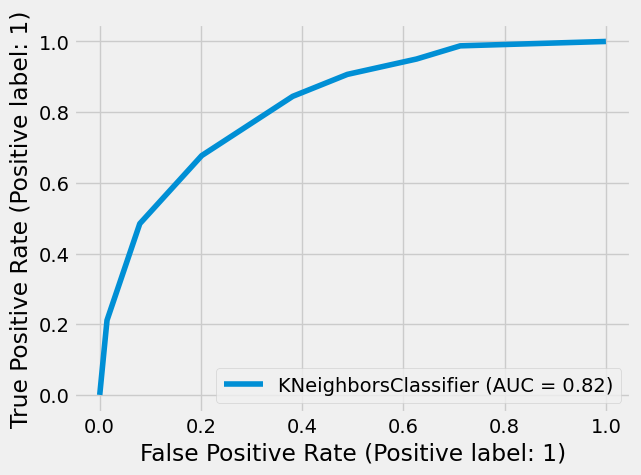

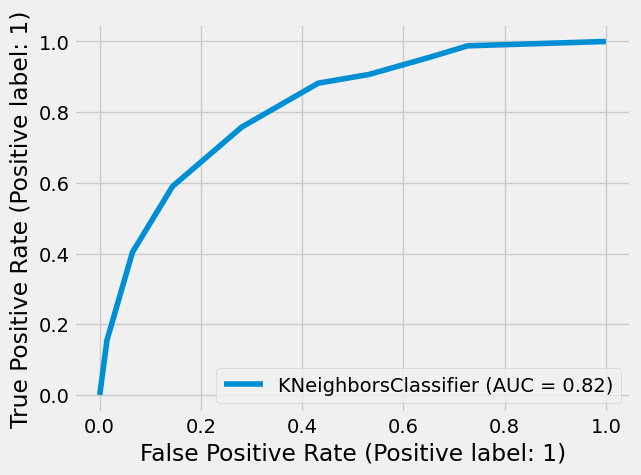

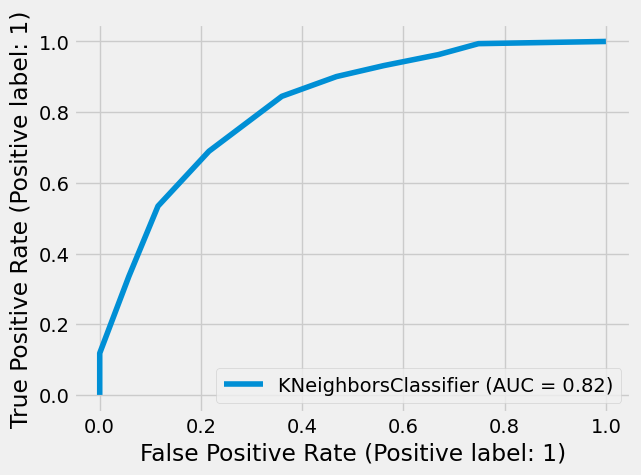

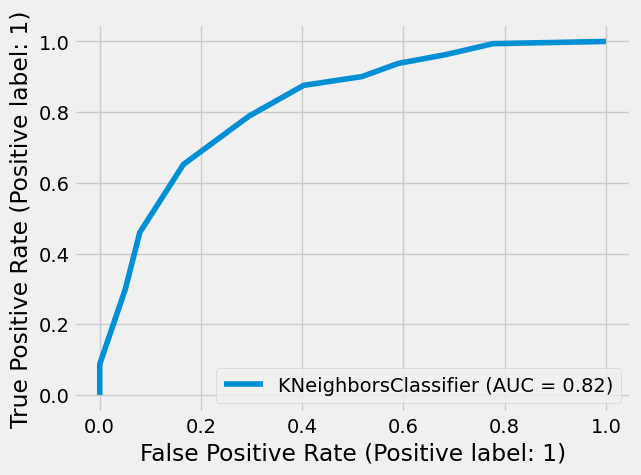

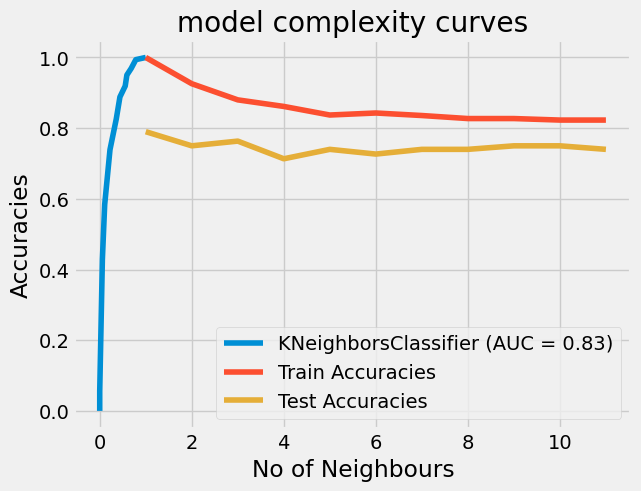

In [58]:
#lets tune the HyperParameters

neighbours = np.arange(1,12)
train_accuracies = np.empty(len(neighbours))
test_accuracies = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)
    y_score = knn.predict_proba(X_test)[:,1]
    print(roc_auc_score(y_test,y_score))
    plot_roc_curve(knn,X_test,y_test)
    train_accuracies[i] = knn.score(X_train, y_train)
    test_accuracies[i] = knn.score(X_test, y_test)
    
#plot the model complexity curves

plt.title("model complexity curves")
plt.plot(neighbours, train_accuracies, label="Train Accuracies")
plt.plot(neighbours, test_accuracies, label="Test Accuracies")
plt.legend()
plt.xlabel("No of Neighbours")
plt.ylabel("Accuracies")
plt.show()

### Model Interpretation

In [59]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 4.5 MB/s eta 0:00:00


In [60]:
import shap

In [ ]:
value = shap.

### Create pipeline for Deployment

In [61]:
from sklearn.pipeline import Pipeline
sc = StandardScaler()
knn_2 = KNeighborsClassifier()
X_train,X_test,y_train,y_test = preprocess(df,'Outcome')
steps = [('scaling',sc),('model',knn_2)]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print_metrics(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       139
           1       0.75      0.89      0.81       161

    accuracy                           0.78       300
   macro avg       0.79      0.77      0.77       300
weighted avg       0.79      0.78      0.78       300

roc score: 0.7714375083783904


### Pickle the pipeline

In [62]:
import pickle

In [64]:
model = open('knn.pickle','wb')
pickle.dump(pipeline,model)
model.close()

### Deployment of pickled Model

In [75]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
st.title('Health Diagnostics')

#step1 :  Load the model
model = open('knn.pickle','rb')
clf = pickle.load(model)
model.close()

#step2 : get user input
pregs = st.number_input('Pregnancies',1,20,step=1)
glucose = st.slider('Glucose',40.0,200.0,40.0)
bp = st.slider('BloodPressure',24.0,122.0,24.0)
skt = st.slider('SkinThickness',5,100,7) 
insulin = st.slider('Insulin',14.0,845.0,18.0)
bmi=st.slider('BMI',18.0,68.0,18.2)
dpf = st.slider('DiabetesPedigreeFunction',0.0,3.0,0.0)
age = st.slider('Age',10,100,25)

#step3: user input to model input
data = {
    'Pregnancies':pregs, 'Glucose':glucose, 'BloodPressure':bp, 'SkinThickness':skt, 'Insulin':insulin,
       'BMI':bmi, 'DiabetesPedigreeFunction':dpf, 'Age':age
}
input_data = pd.DataFrame([data])

#step4
preds = clf.predict(input_data)[0]
if st.button('Predict'):
    if preds==1:
        st.error('The person has diabetes')
    if preds==0:
        st.success('The person is diabetes free')

Overwriting app.py


In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
df.agg(['min','max'])

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
min            0       44             24              7     14.0  18.2   
max           17      199            122             99    846.0  67.1   

     DiabetesPedigreeFunction  Age  Outcome  
min                     0.078   21        0  
max                     2.420   81        1